### PCA Mini Project

In the lesson, you saw how you could use PCA to substantially reduce the dimensionality of the handwritten digits.  In this mini-project, you will be using the **cars.csv** file.  

To begin, run the cell below to read in the necessary libraries and the dataset.  I also read in the helper functions that you used throughout the lesson in case you might find them helpful in completing this project.  Otherwise, you can always create functions of your own!

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\mbd_p\Anaconda3\envs\UdaCity_01_Intro_ML\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from helper_functions import do_pca, scree_plot, plot_components, pca_results
import test_code2 as t

In [3]:
df = pd.read_csv('./data/cars.csv')

`1.` Now your data is stored in **df**.  Use the below cells to take a look your dataset.  At the end of your exploration, use your findings to match the appropriate variable to each key in the dictionary below.  

In [16]:
#Use this cell for work
print("df.shape = ", df.shape)

df.shape =  (387, 18)


In [15]:
df.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


### Sports ～ RWD の7個は、0/1 => ここでは、これをdummy variableと言っている？

In [17]:
df.describe()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
count,387.000000,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.116279,0.152455,0.072351,0.054264,0.0,0.201550,0.242894,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,0.320974,0.359926,0.259404,0.226830,0.0,0.401677,0.429387,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


In [6]:
print("------------------------------------------------------------")
print("【重複チェック ==> indexもcolumnも重複はない】")
unique_index  = df.index.unique()
unique_column = df.columns.unique()
print("len(unique_index)  = ", len(unique_index))
print("len(unique_column) = ", len(unique_column))

------------------------------------------------------------
【重複チェック ==> indexもcolumnも重複はない】
len(unique_index)  =  387
len(unique_column) =  18


In [7]:
print("------------------------------------------------------------")
print("【nan の チェック ==> nanはない】")
print("df.isnull() = \n", df.isnull().all(axis=0))

------------------------------------------------------------
【nan の チェック ==> nanはない】
df.isnull() = 
 Sports        False
SUV           False
Wagon         False
Minivan       False
Pickup        False
AWD           False
RWD           False
Retail        False
Dealer        False
Engine        False
Cylinders     False
Horsepower    False
CityMPG       False
HighwayMPG    False
Weight        False
Wheelbase     False
Length        False
Width         False
dtype: bool


In [8]:
# and this one
print(df["HighwayMPG"].max(axis=0))

66


In [9]:
# and this one if you need it - and create more cells if you need them

In [10]:
a = 7
b = 66
c = 387
d = 18
e = 0.23
f = 0.05

solution_1_dict = {
    'The number of cars in the dataset': c,
    'The number of car features in the dataset': d,
    'The number of dummy variables in the dataset': a,
    'The proportion of minivans in the dataset': f,
    'The max highway mpg for any car': b
}

In [11]:
# Check your solution against ours by running this cell
display.HTML(t.check_question_one(solution_1_dict))

Nice job!  Looks like your dataset matches what we found!


`2.` There are some particularly nice properties about PCA to keep in mind.  Use the dictionary below to match the correct variable as the key to each statement.  When you are ready, check your solution against ours by running the following cell.

In [18]:
a = True
b = False

solution_2_dict = {
    'The components span the directions of maximum variability.': a,
    'The components are always orthogonal to one another.': a,
    'Eigenvalues tell us the amount of information a component holds': a
}

In [19]:
# Check your solution against ours by running this cell
t.check_question_two(solution_2_dict)

That's right these are all true.  Principal components are orthogonal, span the directions of maximum variability, and the corresponding eigenvalues tell us how much of the original variability is explained by each component.


`3.` Fit PCA to reduce the current dimensionality of the datset to 3 dimensions.  You can use the helper functions, or perform the steps on your own.  If you fit on your own, be sure to standardize your data.  At the end of this process, you will want an X matrix with the reduced dimensionality to only 3 features.  Additionally, you will want your **pca** object back that has been used to fit and transform your dataset. 

In [21]:
#Scale your data, fit, and transform using pca
#you need a pca object and your transformed data matrix
def do_my_pca(n_components, data):
    X     = StandardScaler().fit_transform(data)
    pca   = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [22]:
n_components = 3
pca, X_pca   = do_my_pca(n_components, df)

### pcaオブジェクトの整理

In [30]:
print(pca.components_)

[[ 3.42933427e-02  1.29841871e-01 -2.88806208e-02  4.80997332e-02
   0.00000000e+00  9.27807692e-02  1.17493386e-01  2.59171031e-01
   2.57635917e-01  3.39574521e-01  3.26259034e-01  3.11757693e-01
  -3.06272037e-01 -3.06146833e-01  3.31656023e-01  2.54577098e-01
   2.41391518e-01  2.88628356e-01]
 [-4.42046358e-01  2.26103107e-01  1.06171349e-02  2.07353407e-01
   2.77555756e-17  1.44703959e-01 -3.75101506e-01 -3.44690590e-01
  -3.45330207e-01 -2.18732292e-03 -7.98651408e-02 -2.34151497e-01
  -1.69277336e-02 -4.33288902e-02  1.83179152e-01  3.06567922e-01
   2.70099248e-01  2.16317192e-01]
 [-8.75492713e-02 -4.89846790e-01 -4.95696572e-02  2.81773547e-01
   0.00000000e+00 -5.50594051e-01  2.41551438e-01 -1.53785990e-02
  -1.32423657e-02  4.88974508e-02  6.47614671e-02 -4.02948633e-03
   1.42103124e-01  2.48639079e-01 -8.51337946e-02  2.84634367e-01
   3.36143242e-01  1.36917121e-01]]


### 小数点4桁の数値に変換

In [32]:
print( np.round(pca.components_, 4))

[[ 0.0343  0.1298 -0.0289  0.0481  0.      0.0928  0.1175  0.2592  0.2576
   0.3396  0.3263  0.3118 -0.3063 -0.3061  0.3317  0.2546  0.2414  0.2886]
 [-0.442   0.2261  0.0106  0.2074  0.      0.1447 -0.3751 -0.3447 -0.3453
  -0.0022 -0.0799 -0.2342 -0.0169 -0.0433  0.1832  0.3066  0.2701  0.2163]
 [-0.0875 -0.4898 -0.0496  0.2818  0.     -0.5506  0.2416 -0.0154 -0.0132
   0.0489  0.0648 -0.004   0.1421  0.2486 -0.0851  0.2846  0.3361  0.1369]]


### 寄与率

In [33]:
print( pca.explained_variance_ratio_)

[0.43523581 0.16673609 0.10344097]


In [31]:
index_name   = ["Dimension {}".format(i+1) for i in range(n_components)]
print(index_name)

['Dimension 1', 'Dimension 2', 'Dimension 3']


`4.` Once you have your pca object, you can take a closer look at what comprises each of the principal components.  Use the **pca_results** function from the **helper_functions** module assist with taking a closer look at the results of your analysis.  The function takes two arguments: the full dataset and the pca object you created.

In [71]:
def trans_pca_res_to_df( df, pca, flag_plot=0):
    # 準備
    n_components  = len(pca.components_)
    index_name    = ["Dimension {}".format(i+1) for i in range(n_components)]
    data_for_df_1 = np.round(pca.components_, 4)
    data_for_df_2 = pca.explained_variance_ratio_.reshape(n_components, 1)
    
    #　DataFrameの作成 -1 
    df_pca_1 = pd.DataFrame( data_for_df_1, columns = df.keys() )
    df_pca_1.index = index_name
    
    #　DataFrameの作成 -2
    df_pca_2 = pd.DataFrame( data_for_df_2, columns = ["Explained Variance"] )
    df_pca_2.index = index_name
    
    ##　DataFrameの作成 -3
    df_pca_3 = pd.concat( [df_pca_2, df_pca_1], axis=1 )
    
    #
    if flag_plot:
        plt.rcParams['font.size'] = 16
        fig, ax = plt.subplots(figsize=(14,8))
        df_pca_1.plot( ax = ax, kind='bar' , legend=False);
        
        # 装飾
        ax.set_ylabel('Feature Weights')
        ax.set_xticklabels(index_name, rotation=0)
        plt.legend(df_pca_1.columns, loc='lower left', fontsize=10)
        plt.ylim([-0.8,0.4])      
        plt.grid()
    #
    return df_pca_3

,Explained Variance,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Dimension 1,0.435236,0.0343,0.1298,-0.0289,0.0481,0.0,0.0928,0.1175,0.2592,0.2576,0.3396,0.3263,0.3118,-0.3063,-0.3061,0.3317,0.2546,0.2414,0.2886
Dimension 2,0.166736,-0.4420,0.2261,0.0106,0.2074,0.0,0.1447,-0.3751,-0.3447,-0.3453,-0.0022,-0.0799,-0.2342,-0.0169,-0.0433,0.1832,0.3066,0.2701,0.2163
Dimension 3,0.103441,-0.0875,-0.4898,-0.0496,0.2818,0.0,-0.5506,0.2416,-0.0154,-0.0132,0.0489,0.0648,-0.0040,0.1421,0.2486,-0.0851,0.2846,0.3361,0.1369


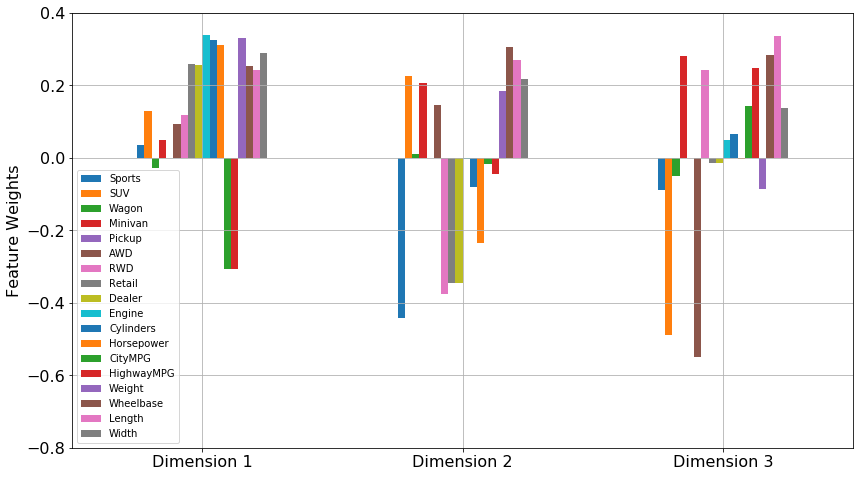

In [72]:
trans_pca_res_to_df( df, pca, flag_plot=1)

`5.` Use the results, to match each of the variables as the value to the most appropriate key in the dictionary below.  When you are ready to check your answers, run the following cell to see if your solution matches ours!

### question5-1が間違っている。 誤=positively / 正=negatively

In [83]:
a = 'car weight'
b = 'sports cars'
c = 'gas mileage'
d = 0.4352
e = 0.3061
f = 0.1667
g = 0.7053

solution_5_dict = {
    'The first component positively weights items related to': c, 
    'The amount of variability explained by the first component is': d,
    'The largest weight of the second component is related to': b,
    'The total amount of variability explained by the first three components': g
}

In [84]:
# Run this cell to check if your solution matches ours.
t.check_question_five(solution_5_dict)

That's right!  Looks like you know a lot about PCA!


`6.` How many components need to be kept to explain at least 85% of the variability in the original dataset?  When you think you have the answer, store it in the variable `num_comps`.  Then run the following cell to see if your solution matches ours!

In [86]:
#Code to find number of components providing more than 
# 85% of variance explained
for i in range(10):
    n_components = i + 1
    pca, X_pca   = do_my_pca(n_components, df)
    ratio = np.sum( pca.explained_variance_ratio_ )
    print("n = {0:02d}, ratio = {1:.3f}".format(n_components, ratio))

n = 01, ratio = 0.435
n = 02, ratio = 0.602
n = 03, ratio = 0.705
n = 04, ratio = 0.769
n = 05, ratio = 0.824
n = 06, ratio = 0.868
n = 07, ratio = 0.897
n = 08, ratio = 0.925
n = 09, ratio = 0.950
n = 10, ratio = 0.968


In [87]:
num_comps = 6##num components stored here

In [88]:
# Now check your answer here to complete this mini project!
display.HTML(t.question_check_six(num_comps))

Nice job!  That's right!  With 6 components, you can explain more than 85% of the variability in the original dataset.
